In [191]:
#!/usr/bin/env python
# -*- coding: utf-8 -*-
from IPython.core.display import display, HTML #HTML output for ipython notebook
from osgeo import gdal
from geopy.geocoders import Nominatim
from collections import OrderedDict
from prettytable import PrettyTable
from prettytable import from_html
import calendar
import os
import numpy as np
from numpy import ma
from collections import Counter

In [192]:
path = 'data'
city = 'Sankt Petersburg'
bit_value = 4 # bit number for values
g = Nominatim().geocode(city, timeout=5)
position = (g.longitude, g.latitude)

In [210]:
# Extract raster data value at a point :

def get_value_at_point(rasterfile, pos):
    gdata = gdal.Open(rasterfile)
    gt = gdata.GetGeoTransform()
    band = gdata.GetRasterBand(1)
    nodata = band.GetNoDataValue()     
    data = gdata.ReadAsArray().astype(np.float)
    gdata = None
    masked_data = ma.masked_values(data, nodata, copy=False) # mask no value data
    masked_data.fill_value = nodata
    d_values = np.around(masked_data, decimals=bit_value) # rounding values
    x = int((pos[0] - gt[0])/gt[1])
    y = int((pos[1] - gt[3])/gt[5])    
    x_value = round(d_values[y, x], bit_value) # desired quantity
    
    # search coordinates which corresponded by overlapped value:
    search_pix = zip(*np.where(d_values == x_value)) # search pixel cootdinates
    overlapped = map(lambda pix :(round(gt[3] + pix[1] * gt[4] + pix[0] * gt[5], 4), # lat
                  round(gt[0] + pix[1] * gt[1] + pix[0] * gt[2], 4)), search_pix) # # long
    
    
    
    return x_value, overlapped


In [204]:
def pixtomap(pix):
    coordinate = (round(gt[3] + pix[1] * gt[4] + pix[0] * gt[5], 4),
                  round(gt[0] + pix[1] * gt[1] + pix[0] * gt[2], 4))
    return coordinate

In [205]:
def ext_data():
    result_data = []
    val_dataset = sorted(os.listdir(path))
    for val in val_dataset: # list of datasets by climate values
        res = []
        for m in [x for x in range(1,13)]: #get data by month(from datasets like wc2.0_5m_tmax_01.tif) 
            result = get_value_at_point('data/%s/wc2.0_5m_%s_%02d.tif' % (val, val, m), position)
            res.append(result) 

        result_data.append((val, res))
    return result_data, val_dataset

In [305]:
def output_table(extdata):
    mgen_names = [calendar.month_name[x] for x in range(1,13)]
    table = PrettyTable()
    table.add_column("Month", mgen_names)
    for k in extdata[0]:
        print k[0]
        for j in k:
            print j
           # table.add_column(k[0], j)
    print(city)
    #print(table)
    #HTML output for ipython notebook:
    #htmltable = table.get_html_string()
    #display(HTML(htmltable))    


In [292]:
extdata = ext_data() # extract data

In [306]:
output = output_table(extdata) # print table 

tavg
tavg
[(-6.355, [(63.25, 21.9167), (62.5833, 22.3333), (61.0833, 14.5833), (60.0, 30.25), (49.4167, 28.9167), (49.25, 39.8333), (49.0, 39.0833), (48.9167, 39.3333), (47.8333, -87.25), (47.6667, 47.0833), (45.4167, 54.1667), (45.1667, 54.6667), (44.8333, -65.25), (44.75, -106.75), (43.0833, -75.3333), (43.0, -73.6667), (42.5, -72.0), (42.3333, 76.0), (36.75, 107.5833), (36.75, 108.8333), (33.6667, 104.9167), (-70.9167, 10.75), (-71.1667, 8.9167), (-71.1667, 19.6667), (-73.25, -13.9167), (-73.6667, -80.4167), (-74.0, -121.5833), (-74.8333, -122.8333), (-74.9167, -133.5833), (-76.0, -73.8333), (-77.8333, -76.9167), (-77.9167, -157.1667), (-78.9167, -152.5833), (-80.6667, -32.6667), (-81.3333, -40.0), (-82.4167, -65.75), (-83.6667, -161.75), (-84.6667, -157.0), (-84.75, -155.0833), (-85.25, -159.6667)]), (-6.248, [(63.75, -41.0833), (60.0, -160.5833), (60.0, 30.25), (58.3333, 25.25), (58.3333, 25.5833), (56.0833, 29.3333), (53.9167, 31.5833), (53.6667, -123.3333), (53.1667, -119.6667),

In [69]:
def check_func(rasterfile, pos):
    gdata = gdal.Open(rasterfile)
    gt = gdata.GetGeoTransform()
    band = gdata.GetRasterBand(1)
    nodata = band.GetNoDataValue()     
    data = gdata.ReadAsArray().astype(np.float)
    gdata = None
    masked_data = ma.masked_values(data, nodata, copy=False) # mask no value data
    masked_data.fill_value = nodata
    d_values = np.around(masked_data, decimals=bit_value) # rounding values
    x = int((pos[0] - gt[0])/gt[1])
    y = int((pos[1] - gt[3])/gt[5]) 
    x_value = round(d_values[y, x], bit_value) 
    
    return rasterfile, (pos[1],pos[0]), x_value

In [198]:
def check_ext_data(extdata):
    result_data = []

    for i in extdata[0]:
        for j in i[1][0][1]: # [0] mean January
           
            result = check_func('data/tavg/wc2.0_5m_tavg_01.tif', (j[1], j[0]) )
            print result

In [199]:
check_ext_data(extdata) # check for  

('data/tavg/wc2.0_5m_tavg_01.tif', (63.25, 21.9167), -6.355)
('data/tavg/wc2.0_5m_tavg_01.tif', (62.5833, 22.3333), -6.297)
('data/tavg/wc2.0_5m_tavg_01.tif', (61.0833, 14.5833), -6.216)
('data/tavg/wc2.0_5m_tavg_01.tif', (60.0, 30.25), -6.355)
('data/tavg/wc2.0_5m_tavg_01.tif', (49.4167, 28.9167), -6.282)
('data/tavg/wc2.0_5m_tavg_01.tif', (49.25, 39.8333), -6.376)
('data/tavg/wc2.0_5m_tavg_01.tif', (49.0, 39.0833), -6.269)
('data/tavg/wc2.0_5m_tavg_01.tif', (48.9167, 39.3333), -6.484)
('data/tavg/wc2.0_5m_tavg_01.tif', (47.8333, -87.25), -6.355)
('data/tavg/wc2.0_5m_tavg_01.tif', (47.6667, 47.0833), -6.456)
('data/tavg/wc2.0_5m_tavg_01.tif', (45.4167, 54.1667), -6.503)
('data/tavg/wc2.0_5m_tavg_01.tif', (45.1667, 54.6667), -6.281)
('data/tavg/wc2.0_5m_tavg_01.tif', (44.8333, -65.25), -6.355)
('data/tavg/wc2.0_5m_tavg_01.tif', (44.75, -106.75), -6.355)
('data/tavg/wc2.0_5m_tavg_01.tif', (43.0833, -75.3333), -6.355)
('data/tavg/wc2.0_5m_tavg_01.tif', (43.0, -73.6667), -6.404)
('data/ta

In [41]:
#for r in comparsion_climate(output):
#    if r != None:
#        print r[0].upper() # name of value
#        print "-"*74
#        for c,v,m in r[1]: 
#            print m # month
#            print v # value
#            for i in c:
#                print i # coordinates
#        print "-"*74
#

In [38]:
geolocator = Nominatim()
location = geolocator.reverse("55.5, 78.166666666666629")
print(location.address)

50К-22, Куйбышевский район, Новосибирская область, СФО, РФ


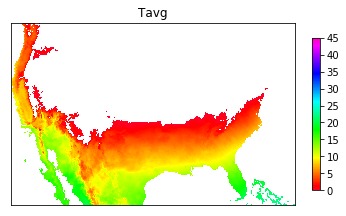

In [85]:
from osgeo import gdal
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.basemap import Basemap

# Plotting 2070 projected August (8) precip from worldclim
gdata = gdal.Open("data/tavg/wc2.0_10m_tavg_01.tif")
geo = gdata.GetGeoTransform()
data = gdata.ReadAsArray()

xres = geo[1]
yres = geo[5]

# A good LCC projection for USA plots
m = Basemap(llcrnrlon=-119,llcrnrlat=22,urcrnrlon=-64,urcrnrlat=49,
            projection='lcc',lat_1=33,lon_0=-95)

xmin = geo[0] + xres * 0.5
xmax = geo[0] + (xres * gdata.RasterXSize) - xres * 0.5
ymin = geo[3] + (yres * gdata.RasterYSize) + yres * 0.5
ymax = geo[3] - yres * 0.5

x,y = np.mgrid[xmin:xmax+xres:xres, ymax+yres:ymin:yres]
x,y = m(x,y)

cmap = plt.cm.gist_rainbow
cmap.set_under ('1.0')
cmap.set_bad('0.8')

im = m.pcolormesh(x,y, data.T, cmap=cmap, vmin=45, vmax=0)

cb = plt.colorbar( orientation='vertical', fraction=0.10, shrink=0.7)
plt.title('Tavg')
plt.show()